In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-c3y0ruke
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-c3y0ruke
  Resolved https://github.com/facebookresearch/detectron2.git to commit 5b72c27ae39f99db75d43f18fd1312e1ea934e60
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.5 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp3

**Mask R-CNN**

In [ ]:
import torch
import detectron2
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
import cv2
import matplotlib.pyplot as plt

# Load image
image_path = "Rotten (1651).jpg"
image = cv2.imread(image_path)

# Configure Mask R-CNN model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set a threshold for detection
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

# Set to use GPU
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Create predictor
predictor = DefaultPredictor(cfg)

# Perform object detection and segmentation
outputs = predictor(image)


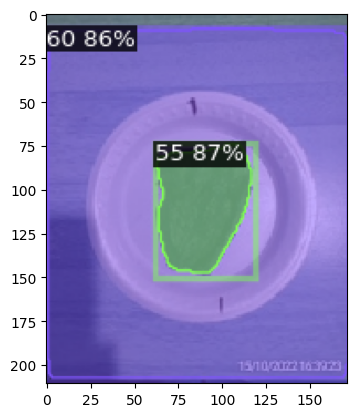

In [ ]:
# Get segmentation masks and visualize the results
v = Visualizer(image[:, :, ::-1], scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])
plt.show()

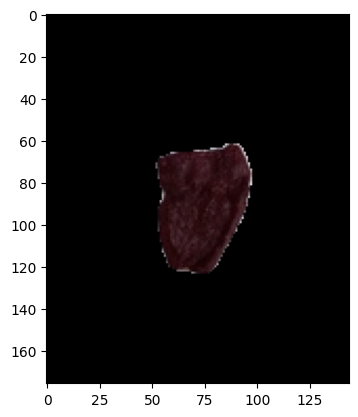

In [ ]:
# Extract masks and class predictions
masks = outputs['instances'].pred_masks.cpu().numpy()
classes = outputs['instances'].pred_classes.cpu().numpy()

# Assuming the model detects multiple objects, filter by a specific class (for example: food item, meat)
# If 'meat' is not directly in the COCO dataset classes, you may need to fine-tune the model or manually inspect the masks.
# For simplicity, we'll take the largest detected object.
largest_mask = masks[0]  # Assumes only one object (meat), adjust if needed.

# Apply the mask to the image
isolated_meat = cv2.bitwise_and(image, image, mask=largest_mask.astype("uint8"))

# Save or display the final result
# cv2.imwrite('isolated_meat.jpg', isolated_meat)
plt.imshow(cv2.cvtColor(isolated_meat, cv2.COLOR_BGR2RGB))
plt.show()